Firsr let's get a daily stock price or the return in yahoo/finance

In [ ]:
#Code for 1)
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
intraday_data = yf.download(tickers="MSFT",
                            period="7d",
                            interval="1d",
                            auto_adjust=True)
intraday_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-03-29,278.959991,281.140015,278.410004,280.510010,25087000
2023-03-30,284.230011,284.459991,281.480011,284.049988,25053400
2023-03-31,283.730011,289.269989,283.000000,288.299988,32740300
2023-04-03,286.519989,288.269989,283.950012,287.230011,24883300
2023-04-04,287.230011,290.450012,285.670013,287.179993,25824300
2023-04-05,285.850006,287.149994,282.920013,284.339996,22064800
2023-04-06,283.209991,292.079987,282.029999,291.600006,29770300


Calculate and plot the autocorrelation for a stock.

[*********************100%***********************]  1 of 1 completed


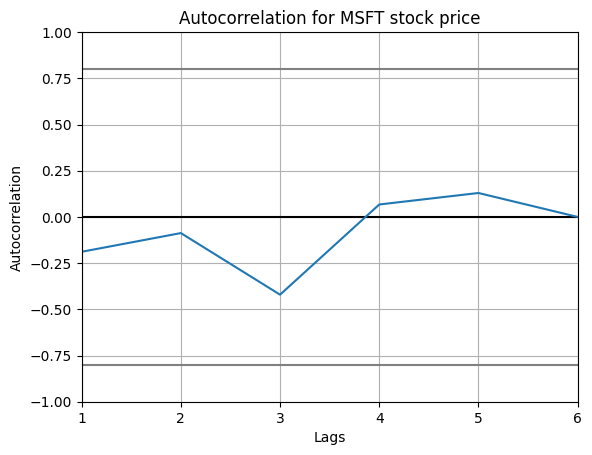

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

intraday_data = yf.download(tickers="MSFT",
                            period="7d",
                            interval="1d",
                            auto_adjust=True)

returns = intraday_data['Close'].pct_change().dropna()

pd.plotting.autocorrelation_plot(returns)
plt.title(f"Autocorrelation for MSFT stock price")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


Get several stock prices (Apple, IBM, Microsoft, Walmart)

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers_list = ['AAPL', 'IBM', 'MSFT', 'WMT']

data = {}
for tickers in tickers_list:
  data[tickers] = yf.download(tickers,
                              period="7d",
                              interval="1d",
                              auto_adjust=True)

intraday_data = pd.concat(data.values(), keys=data.keys(), axis=1)
intraday_data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2023-03-29  159.369995  161.050003  159.350006  160.770004  51305700   
2023-03-30  161.529999  162.470001  161.270004  162.360001  49501700   
2023-03-31  162.440002  165.000000  161.910004  164.899994  68694700   
2023-04-03  164.270004  166.289993  164.220001  166.169998  56976200   
2023-04-04  166.600006  166.839996  165.110001  165.630005  46278300   
2023-04-05  164.740005  165.050003  161.800003  163.759995  51511700   
2023-04-06  162.429993  164.960007  162.000000  164.660004  45390100   

                   IBM                                               \
                  Open        High         Low       Close   Volume   
Date                                                                  
2023-03-29  130.119995  130.350006  129.179993  129.710007  3279600   
2023-03-30  130.160004  131.479996  129.100006  129.220001  3561800   
2023-03-31  129.470001  131.229996  129.419998  131.089996  4524100   
2023-04-03  130.970001  132.610001  130.770004  132.059998  3840100   
2023-04-04  131.990005  132.149994  130.889999  131.600006  3382800   
2023-04-05  131.369995  132.610001  131.369995  132.139999  2898700   
2023-04-06  132.160004  132.600006  130.320007  130.500000  3050600   

                  MSFT                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2023-03-29  278.959991  281.140015  278.410004  280.510010  25087000   
2023-03-30  284.230011  284.459991  281.480011  284.049988  25053400   
2023-03-31  283.730011  289.269989  283.000000  288.299988  32740300   
2023-04-03  286.519989  288.269989  283.950012  287.230011  24883300   
2023-04-04  287.230011  290.450012  285.670013  287.179993  25824300   
2023-04-05  285.850006  287.149994  282.920013  284.339996  22064800   
2023-04-06  283.209991  292.079987  282.029999  291.600006  29770300   

                   WMT                                               
                  Open        High         Low       Close   Volume  
Date                                                                 
2023-03-29  144.369995  144.960007  143.449997  144.229996  8072300  
2023-03-30  145.500000  146.600006  145.020004  145.669998  7293000  
2023-03-31  146.580002  148.440002  146.470001  147.449997  6954400  
2023-04-03  147.729996  148.949997  147.500000  148.690002  6588900  
2023-04-04  148.529999  148.789993  147.020004  147.229996  6037900  
2023-04-05  147.169998  149.880005  147.139999  149.669998  8846900  
2023-04-06  148.800003  151.039993  148.520004  150.800003  5963900

Calculate and plot Pearson correlation coefficients of the price or the return
between two stocks (Apple and IBM)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


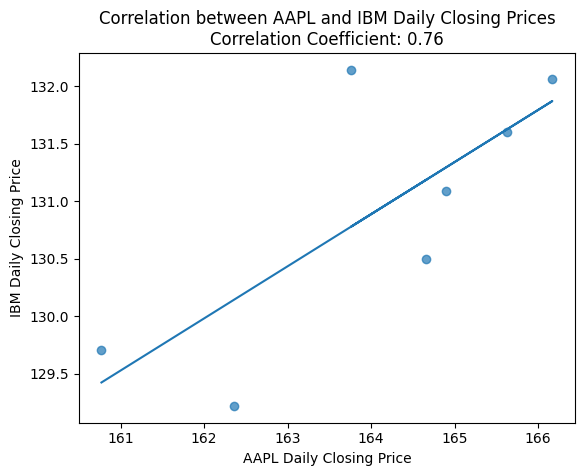

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers_list = ['AAPL', 'IBM']

data = {}
for tickers in tickers_list:
    data[tickers] = yf.download(tickers,
                                period="7d",
                                interval="1d",
                                auto_adjust=True)

intraday_data = pd.concat(data.values(), keys=data.keys(), axis=1)

# Calculate the Pearson correlation coefficient of the daily closing prices
price_corr = intraday_data.loc[:, (slice(None), 'Close')].corr().iloc[0,1]

# Plot a scatter plot of the daily closing prices
plt.scatter(intraday_data['AAPL']['Close'], intraday_data['IBM']['Close'], alpha=0.7)
plt.xlabel('AAPL Daily Closing Price')
plt.ylabel('IBM Daily Closing Price')
z = np.polyfit(intraday_data['AAPL']['Close'], intraday_data['IBM']['Close'], 1)
p = np.poly1d(z)
plt.plot(intraday_data['AAPL']['Close'], p(intraday_data['AAPL']['Close']))


plt.title(f'Correlation between AAPL and IBM Daily Closing Prices\nCorrelation Coefficient: {price_corr:.2f}')
plt.show()
